In [1]:
import sys  
sys.path.insert(1, '../')

from src.models.densenet_gusa import DenseNetGuSA
from utils.loader import Loader
from utils.transform import transform
from src.visualization.visualize_attention import visualize_attention
# import some libraries
import torch
import math
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt
import pandas as pd

In [9]:
model=DenseNetGuSA(num_classes=4,backbone_name='densenet169')
model.load_state_dict(torch.load('../weights/model_densenet_3.pth',map_location='cpu'))

<All keys matched successfully>

In [4]:
print('Upload the image:')
loader = Loader()


Upload the image:


FileUpload(value={}, accept='image/*', description='Upload')

In [6]:
img = loader.getLastImage()
# mask=loader_mask.getLastImage()
img=img.resize((384,384))

In [7]:
img_transformed=transform(img,img_size=(384,384)).unsqueeze(0)

In [8]:
img_transformed.shape

torch.Size([1, 3, 384, 384])

In [10]:
with torch.no_grad():
    model.eval()
    output,roi=model(img_transformed)

In [11]:
classes_df=pd.read_csv('../classes.tsv')
classes=classes_df.sort_values(by=['class_nr'])['class'].to_list()
ground_truth='Tubus - dys'
print(f'Predicted class is  :    {classes[output.argmax()]}')  

Predicted class is  :    Tubus - dys


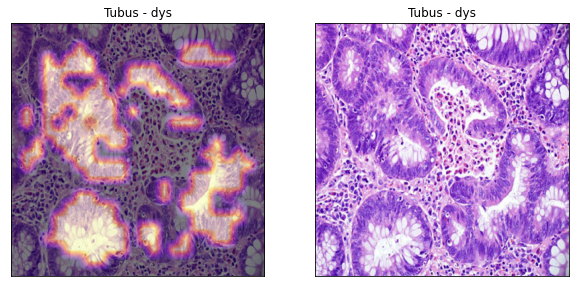

In [13]:
visualize_attention(figsize=(10,10),image=img,rois=[roi],classes=[classes[output.argmax()]],truth=ground_truth,show_original=True)